In [25]:
from collections import Counter,defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [21]:
from simulate_data import *
from topic_model import *

### EDA for simulated data under Model 1 (M1)

In [53]:
sim_data_m1=simulate_data(D=200, K=4, fixed_K = True, V=50, fixed_V = True, 
                    secondary_topic = False, command_level_topics = False, 
                    gamma=1, eta=.05,
                    csi=5, omega=10, seed=1111)


In [51]:
sim_data_m1

dict_keys(['t', 'N', 'M', 'w', 'phi'])

In [48]:
sim_data_m1['w'][0][1]

array([ 5,  5, 16,  5, 27,  5, 46,  5, 47])

In [27]:
with open('./data/data_m1.pkl','wb') as file:
    pickle.dump(sim_data_m1,file,protocol=pickle.HIGHEST_PROTOCOL)

In [38]:
# Get size of vocabulary
def voc_size(data):
    ls=list()
    #make values (lists) of inner dic, a single list
    for k,v in sim_data_m4['w'].items():
        for i in v.values():
            ls.extend(i)
    return(len(Counter(ls)))

In [52]:
voc_size(sim_data_m1['w'])

46

Text(0.5, 1.0, 'Distribution of words under each topic k')

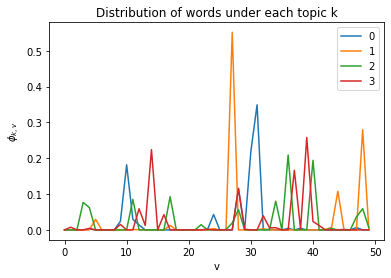

In [31]:
ax = pd.DataFrame(list(sim_data_m1['phi'].values())).T.plot()
ax.set_xlabel("v")
ax.set_ylabel(r'$\phi_{k,v}$')
plt.title("Distribution of words under each topic k")

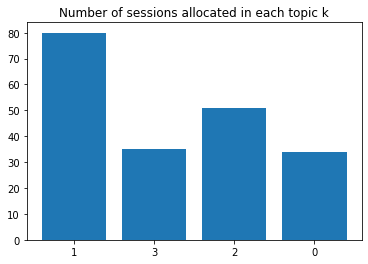

In [32]:
data=Counter(sim_data_m1['t'])
plt.bar(range(len(data)), list(data.values()), tick_label=list(data.keys()))
plt.title("Number of sessions allocated in each topic k")
plt.show()


Text(0.5, 1.0, 'Number of commands in each session')

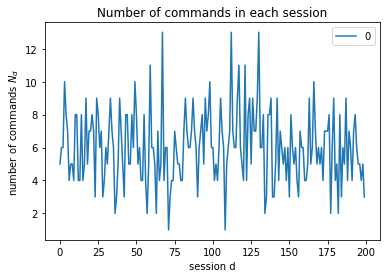

In [33]:
axx=pd.DataFrame(sim_data_m1['N']).plot()
axx.set_xlabel("session d")
axx.set_ylabel("number of commands "+r'$N_d$')
plt.title("Number of commands in each session")

Text(0.5, 1.0, 'Average number of words in commands of each session')

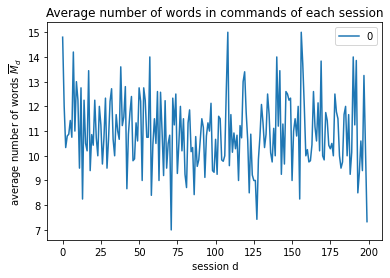

In [34]:
d2={k: np.mean(v) for k, v in sim_data_m1['M'].items()}   
axxx=pd.DataFrame(list(d2.values())).plot()
axxx.set_xlabel("session d")
axxx.set_ylabel("average number of words "+r'$\overline{M}_d$')
plt.title("Average number of words in commands of each session")

### EDA for simulated data under Model 2 (M2)

In [40]:
sim_data_m2=simulate_data(D=200, K=4, fixed_K = True, V=50, fixed_V = True, 
                    secondary_topic = True, command_level_topics = False, 
                    gamma=1, eta=.05,alpha=2,alpha0=1,
                    csi=5, omega=10, seed=1111)

In [41]:
sim_data_m2.keys()

dict_keys(['t', 'N', 'M', 'w', 'phi', 'z', 'theta'])

In [45]:
voc_size(sim_data_m2['w'])

46

Text(0.5, 1.0, 'Distribution of words under each topic k')

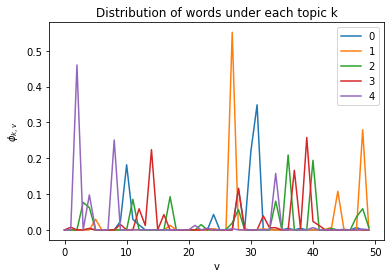

In [5]:
ax2 = pd.DataFrame(list(sim_data_m2['phi'].values())).T.plot()
ax2.set_xlabel("v")
ax2.set_ylabel(r'$\phi_{k,v}$')
plt.title("Distribution of words under each topic k")

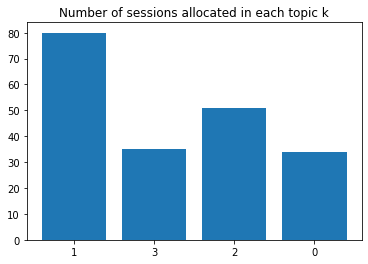

In [6]:
data2=Counter(sim_data_m2['t'])
plt.bar(range(len(data2)), list(data2.values()), tick_label=list(data2.keys()))
plt.title("Number of sessions allocated in each topic k")
plt.show()


In [7]:
sim_data_m2['theta']

array([0.95507144, 0.70189911, 0.79347365, 0.97692617])

In [24]:
# Get summaries for primary secondary topic allocations in simulated data
d3=defaultdict(list)
#make values (lists) of inner dic, a single list
for k,v in sim_data_m2['z'].items():
    ls=list()
    for i in v.values():
        ls.extend(i)
    d3[k]=ls
#apply Counter on values of dic 
d4={k:Counter(v) for k,v in d3.items()}

Text(0.5, 1.0, 'Proportion of 0s and 1s in each session')

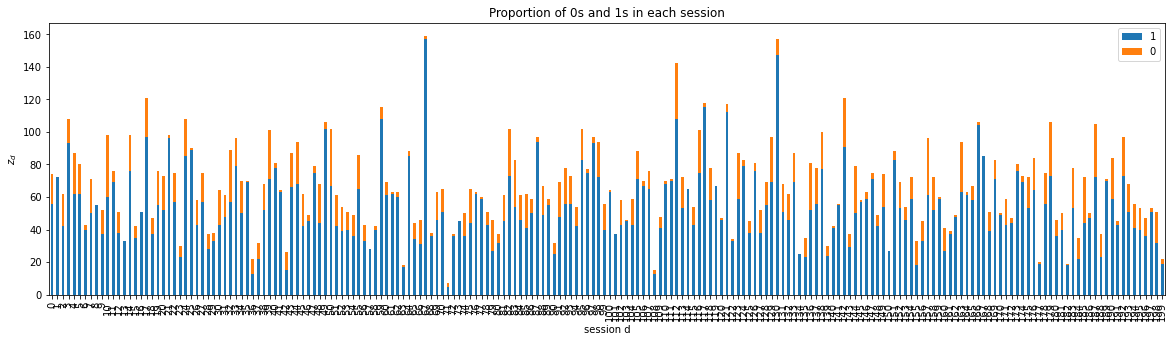

In [26]:
axx2=pd.DataFrame(d4).T.fillna(0).plot.bar(stacked=True,figsize=(20,5))
axx2.set_xlabel("session d")
axx2.set_ylabel(r'$z_{d}$')
plt.title("Proportion of 0s and 1s in each session")

Text(0.5, 1.0, 'Number of commands in each session')

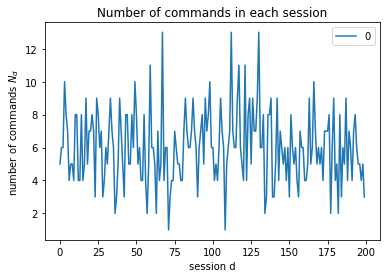

In [27]:
axxx2=pd.DataFrame(sim_data_m2['N']).plot()
axxx2.set_xlabel("session d")
axxx2.set_ylabel("number of commands "+r'$N_d$')
plt.title("Number of commands in each session")

Text(0.5, 1.0, 'Average number of words in commands of each session')

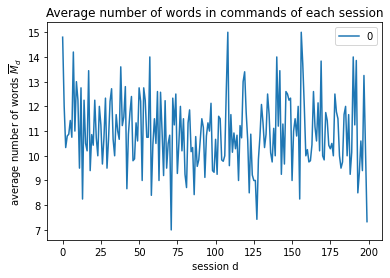

In [28]:
d22={k: np.mean(v) for k, v in sim_data_m2['M'].items()}   
axxxx2=pd.DataFrame(list(d22.values())).plot()
axxxx2.set_xlabel("session d")
axxxx2.set_ylabel("average number of words "+r'$\overline{M}_d$')
plt.title("Average number of words in commands of each session")

### EDA for simulated data under Model 3 (M3)

In [4]:
sim_data_m3=simulate_data(D=200, K=4, fixed_K = True, H=10,fixed_H=True, V=50, fixed_V = True, 
                    secondary_topic = False, command_level_topics = True, 
                    gamma=1, eta=.05,tau=.05,
                    csi=5, omega=10, seed=1111)

In [5]:
sim_data_m3.keys()

dict_keys(['t', 'N', 'M', 'w', 'phi', 's', 'psi'])

Text(0.5, 1.0, 'Distribution of words under each Command-topic k')

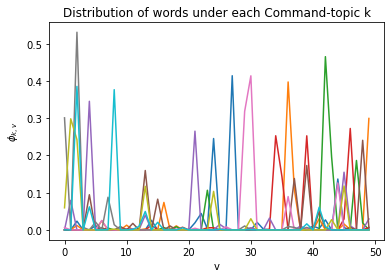

In [48]:
# Note: labels of figure as per paper notation (phi <-> psi)
ax3 = pd.DataFrame(list(sim_data_m3['psi'].values())).T.plot()
ax3.set_xlabel("v")
ax3.set_ylabel(r'$\phi_{k,v}$')
ax3.get_legend().remove()
plt.title("Distribution of words under each Command-topic k")

Text(0.5, 1.0, 'Distribution of Command-topics under each Session-topic k')

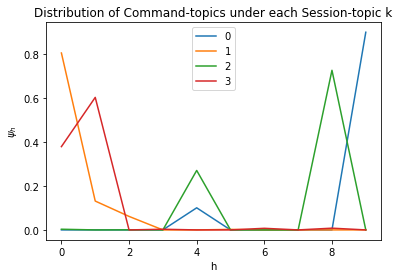

In [57]:
# Note: labels of figure as per paper notation (phi <-> psi)
ax33 = pd.DataFrame(list(sim_data_m3['phi'].values())).T.plot()
ax33.set_xlabel("h")
ax33.set_ylabel(r'$\psi_{h}$')
plt.title("Distribution of Command-topics under each Session-topic k")

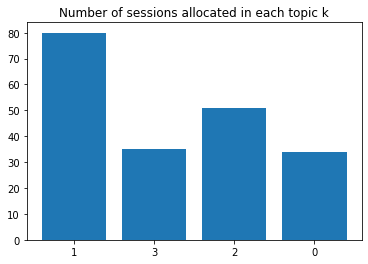

In [58]:
data3=Counter(sim_data_m3['t'])
plt.bar(range(len(data3)), list(data3.values()), tick_label=list(data3.keys()))
plt.title("Number of sessions allocated in each topic k")
plt.show()

### EDA for simulated data under Model 4 (M4)

In [9]:
sim_data_m4=simulate_data(D=200, K=4, fixed_K = True, H=10,fixed_H=True, V=50, fixed_V = True, 
                    secondary_topic = True, command_level_topics = True, 
                    gamma=1, eta=.05,alpha=2,alpha0=1,tau=.05,
                    csi=5, omega=10, seed=1111)

In [10]:
sim_data_m4.keys()

dict_keys(['t', 'N', 'M', 'w', 'phi', 's', 'psi', 'z', 'theta'])

Text(0.5, 1.0, 'Distribution of Command-topics under each Session-topic k')

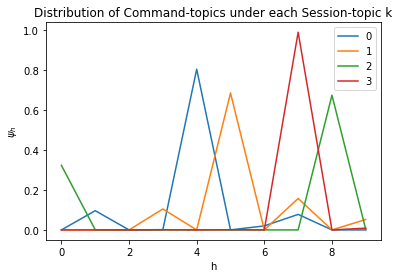

In [15]:


ax4 = pd.DataFrame(list(sim_data_m4['psi'].values())).T.plot()
ax4.set_xlabel("h")
ax4.set_ylabel(r'$\psi_{h}$')
plt.title("Distribution of Command-topics under each Session-topic k")


Text(0.5, 1.0, 'Distribution of words under each Command-topic h')

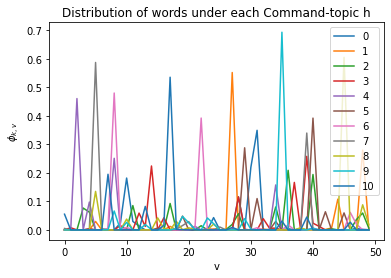

In [16]:
ax44 = pd.DataFrame(list(sim_data_m4['phi'].values())).T.plot()
ax44.set_xlabel("v")
ax44.set_ylabel(r'$\phi_{k,v}$')
#ax4.get_legend().remove()

plt.title("Distribution of words under each Command-topic h")

In [73]:
sim_data_m4['theta']

array([0.50449921, 0.91477667, 0.85199737, 0.67586914, 0.72474106,
       0.48568304, 0.47263687, 0.47118562, 0.90910867, 0.65701788])

In [74]:
# Get summaries for primary secondary topic allocations in simulated data
d4=defaultdict(list)
#make values (lists) of inner dic, a single list
for k,v in sim_data_m4['z'].items():
    ls=list()
    for i in v.values():
        ls.extend(i)
    d4[k]=ls
#apply Counter on values of dic 
d44={k:Counter(v) for k,v in d4.items()}

Text(0.5, 1.0, 'Proportion of 0s and 1s in each session')

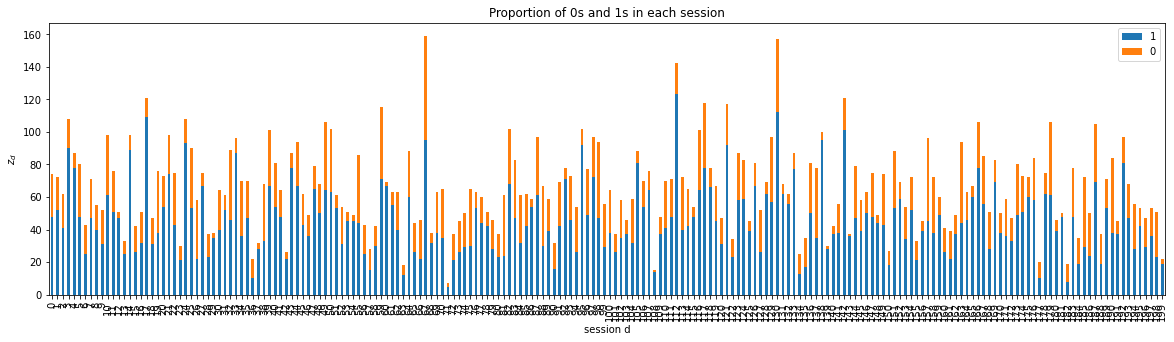

In [75]:
axx4=pd.DataFrame(d44).T.fillna(0).plot.bar(stacked=True,figsize=(20,5))
axx4.set_xlabel("session d")
axx4.set_ylabel(r'$z_{d}$')
plt.title("Proportion of 0s and 1s in each session")

### Testing

In [ ]:
test_sim=simulate_data(D=100, K=3, fixed_K = True, H=2, fixed_H = True, V=50, fixed_V = True, 
                    secondary_topic = True, command_level_topics = True, 
                    gamma=1.0, eta=1.0, alpha=1.0, alpha0=1.0, tau=1.0,
                    csi=5, omega=10, stick_truncation=100, seed=111)

In [ ]:
test_sim

In [ ]:
testdir=np.zeros(shape=(100,3))
for i in range(100):
    testdir[i]=np.random.dirichlet(alpha=np.ones(3)*.01)

In [ ]:
sum(testdir[:,1])/100

In [ ]:
sum(testdir[:,2])/100

In [ ]:
sum(testdir[:,0])/100

In [ ]:
theta=np.zeros(shape=(100,2))
for i in range(100):
    theta[i] = np.random.beta(a=1, b=1, size=3)

In [ ]:
sum(np.random.beta(a=2, b=1, size=100))/100

In [78]:
m1=topic_model(W=sim_data_m1['w'], K=4, fixed_K = True, V=50, fixed_V = True, 
                    secondary_topic = False, command_level_topics = False,
                    gamma=1.0, eta=1.0)

In [79]:
m1.init_counts()

In [82]:
m1.custom_init(t=sim_data_m1['t'])

In [86]:
test=m1.MCMC(iterations=100,calculate_ll=True,burnin=0)

Progression: 100 / 100 

In [87]:
test

[-24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.317105358263,
 -24633.31

In [92]:
m1.t


array([1, 3, 1, 2, 2, 1, 3, 1, 3, 1, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 3,
       1, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0, 3, 1, 2,
       1, 1, 0, 3, 1, 0, 1, 2, 1, 2, 2, 1, 1, 3, 0, 0, 2, 3, 3, 2, 0, 1,
       1, 3, 2, 1, 1, 1, 3, 3, 1, 1, 3, 3, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0,
       1, 0, 1, 1, 2, 1, 1, 2, 3, 3, 1, 1, 0, 0, 1, 3, 1, 2, 3, 2, 2, 2,
       0, 0, 2, 1, 0, 2, 1, 3, 2, 3, 3, 3, 0, 1, 0, 2, 3, 1, 2, 1, 0, 2,
       2, 2, 3, 1, 1, 1, 2, 2, 3, 3, 2, 2, 1, 3, 0, 3, 2, 1, 3, 0, 2, 1,
       1, 1, 2, 1, 1, 3, 1, 0, 0, 1, 0, 2, 0, 3, 1, 2, 3, 1, 0, 0, 0, 2,
       1, 0, 2, 1, 2, 2, 3, 1, 1, 1, 0, 1, 1, 3, 1, 3, 2, 1, 1, 2, 1, 0,
       1, 2])

In [3]:
np.cumsum(np.array([1,2,3]))

array([1, 3, 6])

In [18]:
moves_probs = [5, 1]
moves_probs /= np.sum(moves_probs)

In [19]:
moves_probs

array([0.83333333, 0.16666667])

In [98]:
for i in range(300):
    if i>=50 and (i-50)%30==0:
        print(i)
        print((i -50) // 30)
#(60 - 50) % 40 == 0

50
0
80
1
110
2
140
3
170
4
200
5
230
6
260
7
290
8


In [82]:
200/40

5.0

In [83]:
(250 - 50) // 40

5

In [99]:
with open("./results/test_m1.pkl",'rb') as patates:
        test_m1=pickle.load(patates)

In [107]:
test_m1['t'][999]

array([1, 3, 1, 2, 2, 1, 3, 1, 3, 1, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 3,
       1, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0, 3, 1, 2,
       1, 1, 0, 3, 1, 0, 1, 2, 1, 2, 2, 1, 1, 3, 0, 0, 2, 3, 3, 2, 0, 1,
       1, 3, 2, 1, 1, 1, 3, 3, 1, 1, 3, 3, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0,
       1, 0, 1, 1, 2, 1, 1, 2, 3, 3, 1, 1, 0, 0, 1, 3, 1, 2, 3, 2, 2, 2,
       0, 0, 2, 1, 0, 2, 1, 3, 2, 3, 3, 3, 0, 1, 0, 2, 3, 1, 2, 1, 0, 2,
       2, 2, 3, 1, 1, 1, 2, 2, 3, 3, 2, 2, 1, 3, 0, 3, 2, 1, 3, 0, 2, 1,
       1, 1, 2, 1, 1, 3, 1, 0, 0, 1, 0, 2, 0, 3, 1, 2, 3, 1, 0, 0, 0, 2,
       1, 0, 2, 1, 2, 2, 3, 1, 1, 1, 0, 1, 1, 3, 1, 3, 2, 1, 1, 2, 1, 0,
       1, 2])

In [105]:
sim_data_m1['t']

array([1, 3, 1, 2, 2, 1, 3, 1, 3, 1, 1, 0, 2, 0, 2, 1, 0, 2, 1, 1, 1, 3,
       1, 2, 2, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 0, 3, 1, 2,
       1, 1, 0, 3, 1, 0, 1, 2, 1, 2, 2, 1, 1, 3, 0, 0, 2, 3, 3, 2, 0, 1,
       1, 3, 2, 1, 1, 1, 3, 3, 1, 1, 3, 3, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0,
       1, 0, 1, 1, 2, 1, 1, 2, 3, 3, 1, 1, 0, 0, 1, 3, 1, 2, 3, 2, 2, 2,
       0, 0, 2, 1, 0, 2, 1, 3, 2, 3, 3, 3, 0, 1, 0, 2, 3, 1, 2, 1, 0, 2,
       2, 2, 3, 1, 1, 1, 2, 2, 3, 3, 2, 2, 1, 3, 0, 3, 2, 1, 3, 0, 2, 1,
       1, 1, 2, 1, 1, 3, 1, 0, 0, 1, 0, 2, 0, 3, 1, 2, 3, 1, 0, 0, 0, 2,
       1, 0, 2, 1, 2, 2, 3, 1, 1, 1, 0, 1, 1, 3, 1, 3, 2, 1, 1, 2, 1, 0,
       1, 2])

In [108]:
np.random.choice(10, size=200)

array([7, 0, 3, 2, 0, 6, 9, 3, 1, 1, 6, 4, 1, 8, 1, 2, 8, 9, 7, 9, 6, 5,
       1, 4, 9, 5, 8, 6, 6, 1, 6, 8, 6, 0, 8, 1, 1, 5, 4, 6, 3, 1, 8, 1,
       2, 0, 0, 8, 3, 9, 5, 5, 3, 3, 4, 2, 7, 5, 6, 3, 6, 5, 3, 9, 4, 9,
       5, 6, 4, 7, 2, 9, 9, 8, 4, 7, 1, 2, 8, 8, 8, 7, 0, 5, 3, 9, 2, 8,
       9, 6, 2, 3, 9, 8, 6, 3, 8, 6, 2, 0, 7, 9, 7, 7, 5, 0, 7, 9, 5, 3,
       9, 6, 7, 8, 1, 6, 7, 2, 2, 8, 6, 5, 4, 8, 8, 7, 2, 8, 6, 4, 1, 9,
       0, 7, 9, 7, 7, 7, 0, 5, 9, 9, 1, 6, 6, 7, 3, 5, 0, 3, 9, 8, 2, 9,
       1, 0, 5, 1, 4, 4, 5, 7, 2, 9, 1, 0, 9, 6, 4, 6, 2, 9, 5, 7, 6, 3,
       1, 5, 2, 7, 9, 5, 1, 5, 5, 9, 8, 6, 9, 9, 2, 3, 8, 9, 6, 9, 6, 6,
       0, 6])